In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
! gdown 1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs
! gdown 1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf

Downloading...
From: https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs
To: /content/historical_data.csv
100% 47.5M/47.5M [00:01<00:00, 40.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf
To: /content/fear_greed_index.csv
100% 90.8k/90.8k [00:00<00:00, 3.66MB/s]


In [42]:
sentiment_data = pd.read_csv('fear_greed_index.csv')
trade_data = pd.read_csv('historical_data.csv')

# **Part A - Data preparation**

In [4]:
sentiment_data.head(4)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04


In [43]:
trade_data.head(4)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12


In [6]:
print(f'Sentiment data has {sentiment_data.shape[0]} rows and {sentiment_data.shape[1]} columns')

Sentiment data has 2644 rows and 4 columns


In [7]:
print(f'Daily trading dataset has {trade_data.shape[0]} rows and {trade_data.shape[1]} columns')

Daily trading dataset has 211224 rows and 16 columns


In [8]:
# Datatype and null value counts in each feature of sentiment dataset
sentiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In sentiment data set two features are continuous and two features are categorical and there are no null values in entire dataset.

In [9]:
# Datatype and null value counts in each feature of daily trading dataset
trade_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In daily trading dataset also there are no null values and datatype of features are object, float and bool.

In both the dataset there are no null values.

In [10]:
# statistical summary of market sentiment dataset
sentiment_data.select_dtypes(exclude='object').describe()

,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


In [11]:
sentiment_data.select_dtypes(include='object').describe()

,classification,date
count,2644,2644
unique,5,2644
top,Fear,2025-05-02
freq,781,1


In [12]:
# statistical summary of market trade dataset
trade_data.select_dtypes(exclude='object').describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [13]:
trade_data.select_dtypes(include='object').describe()

,Account,Coin,Side,Timestamp IST,Direction,Transaction Hash
count,211224,211224,211224,211224,211224,211224
unique,32,246,2,27977,12,101184
top,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,HYPE,SELL,14-02-2025 00:31,Open Long,0x00000000000000000000000000000000000000000000...
freq,40184,68005,108528,441,49895,9032


In [14]:
# Duplicate value checks in market sentiment dataset
sentiment_data.duplicated().any()

np.False_

In [15]:
trade_data.duplicated().any()

np.False_

Timestamp conversion and aligning data by date.

In [44]:
# In sentiment dataset there is date column already so for this table we will not convert timestamp to data as it will be same. We need to correct data type of date column.
sentiment_data['date'] = pd.to_datetime(sentiment_data['date'])
sentiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB


In [45]:
# In question it is mentioned that there are only two coulmns in market sentiment dataset 'date' and 'classification' we will keep these two only.
sentiment_data=sentiment_data.drop(['timestamp','value'],axis=1)
sentiment_data.head(2)

,classification,date
0,Fear,2018-02-01
1,Extreme Fear,2018-02-02


In [46]:
# Timestamp conversion in trade dataset to date
trade_data['date']=pd.to_datetime(trade_data['Timestamp IST'],format='mixed').dt.date

# Timestamp IST and timestamp columns will not be required now.
trade_data.drop(['Timestamp IST','Timestamp'],axis=1,inplace=True)

# aligning data by date
trade_data = trade_data.sort_values(by='date').reset_index(drop=True)

# preview of data
trade_data.head(5)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,date
0,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1898.6,0.0722,137.08,BUY,0.1791,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,2023-01-05
1,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0824,156.39,BUY,0.0967,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,2023-01-05
2,0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891,ETH,1897.9,0.0967,183.53,BUY,0.0000,Open Long,0.0,0x875d3e1af52b5b758e4f04015b774e0111006a118601...,173271100,True,0.000000,0.000000e+00,2023-01-05
3,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.4933,1100.11,BUY,0.0000,Open Long,0.0,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4064960965,True,0.275027,6.320000e+14,2023-05-12
4,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2230.1,0.2500,557.52,BUY,1.3614,Open Long,0.0,0x02721e3c6061bddfdc1204065f9dfe0138003649ef8c...,4064960965,True,0.139381,2.580000e+14,2023-05-12


In [47]:
# Alignining market sentiment dataset by date
sentiment_data = sentiment_data.sort_values(by='date',ascending=True).reset_index(drop=True)
sentiment_data

,classification,date
0,Fear,2018-02-01
1,Extreme Fear,2018-02-02
2,Fear,2018-02-03
3,Extreme Fear,2018-02-04
4,Extreme Fear,2018-02-05
...,...,...
2639,Neutral,2025-04-28
2640,Greed,2025-04-29
2641,Greed,2025-04-30
2642,Neutral,2025-05-01


In [48]:
# For better analysis of results we will label encode account and transaction hash columns.

from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

trade_data['Account']=encode.fit_transform(trade_data.Account)
trade_data['Transaction Hash']=encode.fit_transform(trade_data['Transaction Hash'])

trade_data

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,date
0,5,ETH,1898.6,0.07220,137.08,BUY,0.17910,Open Long,0.000000,53578,173271100,True,0.000000,0.000000e+00,2023-01-05
1,5,ETH,1897.9,0.08240,156.39,BUY,0.09670,Open Long,0.000000,53578,173271100,True,0.000000,0.000000e+00,2023-01-05
2,5,ETH,1897.9,0.09670,183.53,BUY,0.00000,Open Long,0.000000,53578,173271100,True,0.000000,0.000000e+00,2023-01-05
3,27,ETH,2230.1,0.49330,1100.11,BUY,0.00000,Open Long,0.000000,943,4064960965,True,0.275027,6.320000e+14,2023-05-12
4,27,ETH,2230.1,0.25000,557.52,BUY,1.36140,Open Long,0.000000,943,4064960965,True,0.139381,2.580000e+14,2023-05-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,13,BTC,83986.0,0.05346,4489.89,SELL,7.09762,Close Long,20.373606,65563,86011228144,True,1.122472,3.530000e+14,2025-12-04
211220,13,BTC,83986.0,0.44000,36953.84,SELL,7.04416,Close Long,167.684000,65563,86011228144,True,9.238460,4.140000e+12,2025-12-04
211221,13,BTC,83986.0,0.00015,12.60,SELL,6.60416,Close Long,0.057165,65563,86011228144,True,0.003149,9.980000e+14,2025-12-04
211222,13,BTC,83985.0,0.95345,80075.50,SELL,6.48389,Close Long,362.406345,65563,86011228144,True,20.018874,7.460000e+14,2025-12-04


# **Creating key metrics**

1. Daily PnL per trader:

To calculate daily PnL per trader we will group by the trade data on account and date then add all the closed PnL for single day.

In [49]:
# daily PnL
trade_data['acc_avg_daily_PnL']=trade_data.groupby(['Account','date'])['Closed PnL'].transform('mean')
trade_data.head(4)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,date,acc_avg_daily_PnL
0,5,ETH,1898.6,0.0722,137.08,BUY,0.1791,Open Long,0.0,53578,173271100,True,0.000000,0.000000e+00,2023-01-05,0.0
1,5,ETH,1897.9,0.0824,156.39,BUY,0.0967,Open Long,0.0,53578,173271100,True,0.000000,0.000000e+00,2023-01-05,0.0
2,5,ETH,1897.9,0.0967,183.53,BUY,0.0000,Open Long,0.0,53578,173271100,True,0.000000,0.000000e+00,2023-01-05,0.0
3,27,ETH,2230.1,0.4933,1100.11,BUY,0.0000,Open Long,0.0,943,4064960965,True,0.275027,6.320000e+14,2023-05-12,0.0


In [50]:
daily_pnl=trade_data.groupby('date')['Closed PnL'].sum().reset_index()
daily_pnl

,date,Closed PnL
0,2023-01-05,0.000000
1,2023-05-12,0.000000
2,2023-12-14,-205.434737
3,2023-12-15,-24.632034
4,2023-12-16,0.000000
...,...,...
475,2025-11-04,126406.479081
476,2025-12-01,5742.241803
477,2025-12-02,19848.635032
478,2025-12-03,288105.984215


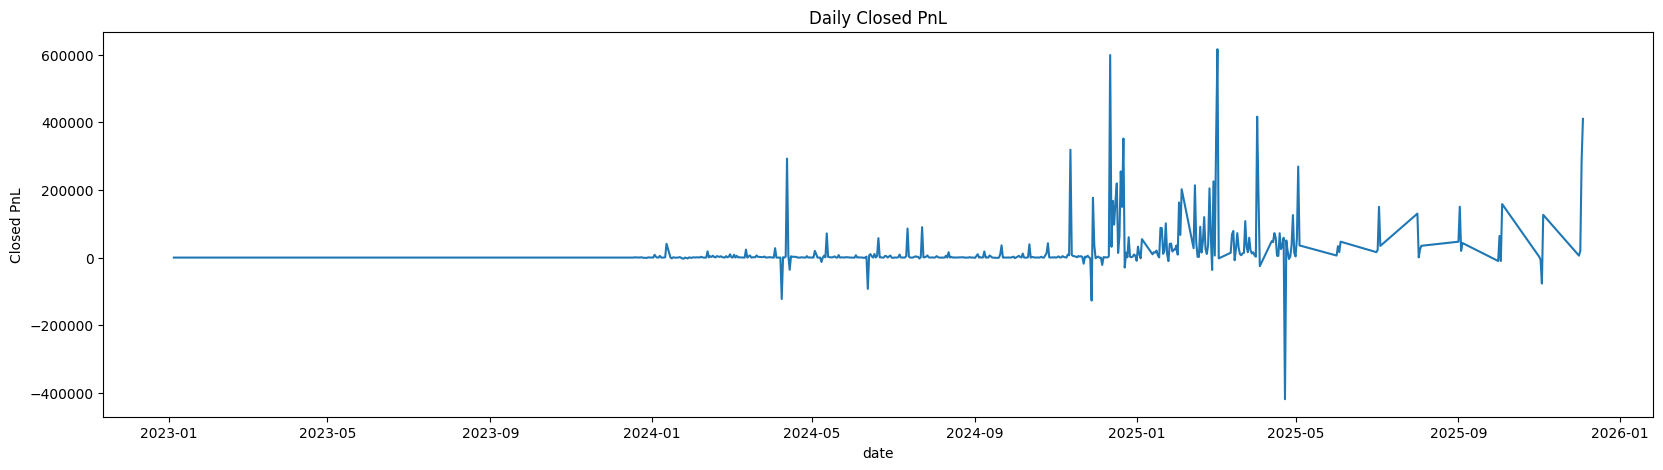

In [51]:
plt.figure(figsize=(20,5))
sns.lineplot(data=daily_pnl,x='date',y='Closed PnL')
plt.title('Daily Closed PnL')
plt.show()

Insights:

Frequency of number of peaks is increaing with time, which is also a sign of increase in closed pnl.

2. Win rate of trader or account:

To calculate win rate of trader or account we will first count the number of transactions with positive PnL then divide by total number of transactions, this will be win rate per transaction, we can also calculate win rate per day in similar way.

In [52]:
# List of accounts
accounts=trade_data['Account'].unique()

# Now we will create one dataframe showing account and win rate
w_=[]
for i in accounts:
  win_rate=len(trade_data[(trade_data['Account']==i) & (trade_data['Closed PnL']>0)])/len(trade_data[trade_data['Account']==i])
  w_.append([i,win_rate])
acc_win_rate = pd.DataFrame(w_,columns=['Account','acc_win_rate'])

# This dataframe now we will merge with trade data
trade_data = trade_data.merge(acc_win_rate,on='Account',how='left')

trade_data.head(4)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,date,acc_avg_daily_PnL,acc_win_rate
0,5,ETH,1898.6,0.0722,137.08,BUY,0.1791,Open Long,0.0,53578,173271100,True,0.000000,0.000000e+00,2023-01-05,0.0,0.455215
1,5,ETH,1897.9,0.0824,156.39,BUY,0.0967,Open Long,0.0,53578,173271100,True,0.000000,0.000000e+00,2023-01-05,0.0,0.455215
2,5,ETH,1897.9,0.0967,183.53,BUY,0.0000,Open Long,0.0,53578,173271100,True,0.000000,0.000000e+00,2023-01-05,0.0,0.455215
3,27,ETH,2230.1,0.4933,1100.11,BUY,0.0000,Open Long,0.0,943,4064960965,True,0.275027,6.320000e+14,2023-05-12,0.0,0.337134


In [53]:
# List of dates
dates_=trade_data['date'].unique()

# Now we will create one dataframe showing account and win rate
d_=[]
for i in dates_:
  win_rate=len(trade_data[(trade_data['date']==i) & (trade_data['Closed PnL']>0)])/len(trade_data[trade_data['date']==i])
  d_.append([i,win_rate])
win_rate_date = pd.DataFrame(d_,columns=['date','win rate'])

In [30]:
# win rate of accounts
acc_win_rate

,Account,win rate
0,5,0.455215
1,27,0.337134
2,17,0.810876
3,12,0.360364
4,21,0.261968
5,4,0.519914
6,3,0.438585
7,24,0.573141
8,10,0.353445
9,20,0.330194


In [31]:
win_rate_date

,date,win rate
0,2023-01-05,0.000000
1,2023-05-12,0.000000
2,2023-12-14,0.363636
3,2023-12-15,0.000000
4,2023-12-16,0.000000
...,...,...
475,2025-11-04,0.335766
476,2025-12-01,0.784053
477,2025-12-02,0.462658
478,2025-12-03,0.564516


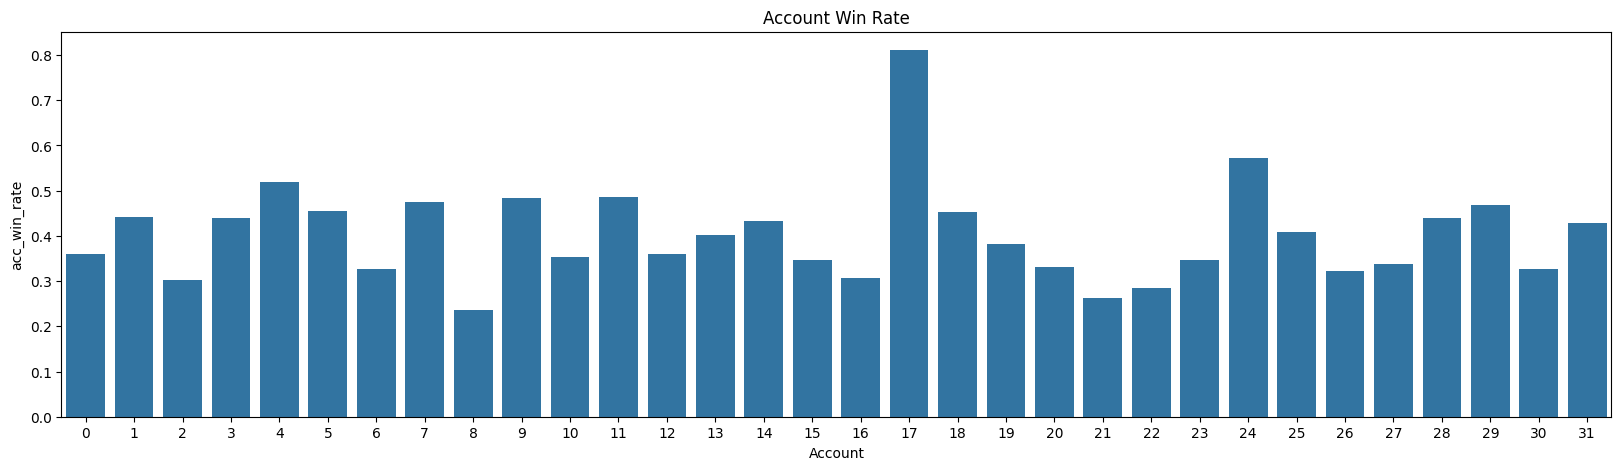

In [54]:
plt.figure(figsize=(20,5))
sns.barplot(data=acc_win_rate,x='Account',y='acc_win_rate')
plt.title('Account Win Rate')
plt.show()

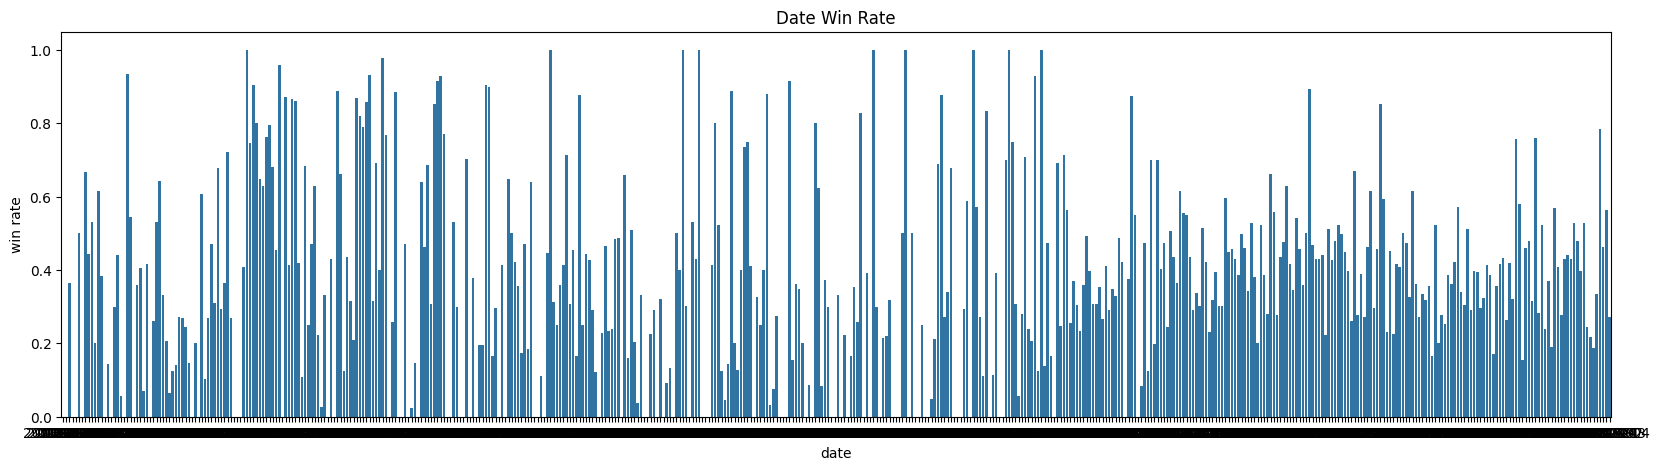

In [35]:
plt.figure(figsize=(20,5))
sns.barplot(data=win_rate_date,x='date',y='win rate')
plt.title('Date Win Rate')
plt.show()

In [55]:
# Win rate of all transactions
win_rate_ = len(trade_data[trade_data['Closed PnL']>0])/len(trade_data)

print(f'Win rate of all transactions is {win_rate_}')

Win rate of all transactions is 0.4112648183918494


3. Average trade size.

In [56]:
# avg trade size of all transactions
avg_trade_size = trade_data['Size USD'].mean()
print(f'Average trade size of all transactions is {avg_trade_size}')

Average trade size of all transactions is 5639.451210373822


In [57]:
# Average trade size of each account
account_avg_trade_size = trade_data.groupby('Account')['Size USD'].mean().reset_index()
account_avg_trade_size

,Account,Size USD
0,0,16159.576734
1,1,1653.226327
2,2,8893.000898
3,3,507.626933
4,4,3138.894782
5,5,1729.941104
6,6,4790.575486
7,7,3445.471265
8,8,5189.367128
9,9,2397.824753


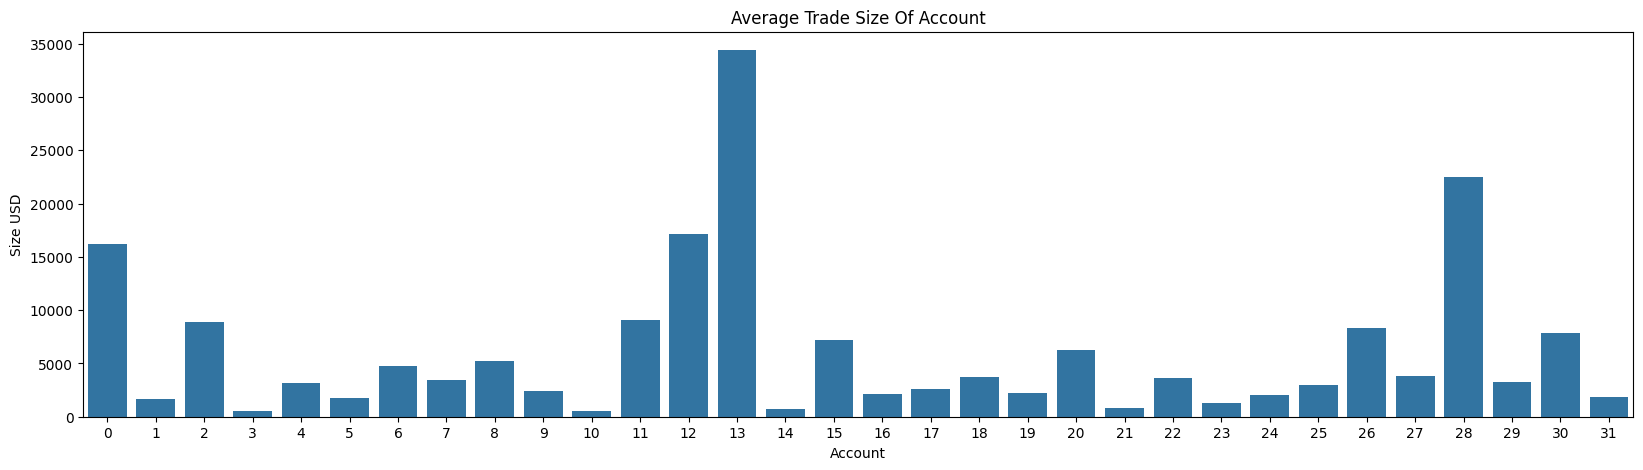

In [39]:
plt.figure(figsize=(20,5))
sns.barplot(data=account_avg_trade_size,x='Account',y='Size USD')
plt.title('Average Trade Size Of Account')
plt.show()

3. Leverage distribution:

Leverage is not there in given dataset, leverage we will calculate by dividing traded tokens with initial amount of tokens present in account.

Leverage term is used for denoting gain from trader buys bitcoin.

In [58]:
# Creating function to calculate leverage.
def leverage(x):
  if x['Side']=='BUY':
    if x['Start Position']>0:
      return x['Size Tokens']/x['Start Position']
    else:
      return 1
  else:
    return 0

In [59]:
trade_data['leverage'] = trade_data.apply(leverage,axis=1)
trade_data

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,date,acc_avg_daily_PnL,acc_win_rate,leverage
0,5,ETH,1898.6,0.07220,137.08,BUY,0.17910,Open Long,0.000000,53578,173271100,True,0.000000,0.000000e+00,2023-01-05,0.000000,0.455215,0.403127
1,5,ETH,1897.9,0.08240,156.39,BUY,0.09670,Open Long,0.000000,53578,173271100,True,0.000000,0.000000e+00,2023-01-05,0.000000,0.455215,0.852120
2,5,ETH,1897.9,0.09670,183.53,BUY,0.00000,Open Long,0.000000,53578,173271100,True,0.000000,0.000000e+00,2023-01-05,0.000000,0.455215,1.000000
3,27,ETH,2230.1,0.49330,1100.11,BUY,0.00000,Open Long,0.000000,943,4064960965,True,0.275027,6.320000e+14,2023-05-12,0.000000,0.337134,1.000000
4,27,ETH,2230.1,0.25000,557.52,BUY,1.36140,Open Long,0.000000,943,4064960965,True,0.139381,2.580000e+14,2023-05-12,0.000000,0.337134,0.183634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,13,BTC,83986.0,0.05346,4489.89,SELL,7.09762,Close Long,20.373606,65563,86011228144,True,1.122472,3.530000e+14,2025-12-04,70.465233,0.401193,0.000000
211220,13,BTC,83986.0,0.44000,36953.84,SELL,7.04416,Close Long,167.684000,65563,86011228144,True,9.238460,4.140000e+12,2025-12-04,70.465233,0.401193,0.000000
211221,13,BTC,83986.0,0.00015,12.60,SELL,6.60416,Close Long,0.057165,65563,86011228144,True,0.003149,9.980000e+14,2025-12-04,70.465233,0.401193,0.000000
211222,13,BTC,83985.0,0.95345,80075.50,SELL,6.48389,Close Long,362.406345,65563,86011228144,True,20.018874,7.460000e+14,2025-12-04,70.465233,0.401193,0.000000


Average, minimum & maximum leverage per account.

In [60]:
leverage_distribution_per_account = trade_data[(trade_data['Side']=='BUY') & (trade_data['Start Position']>0)].groupby('Account')['leverage'].agg(('min','max','mean'))
leverage_distribution_per_account

,min,max,mean
Account,,,
0,5.492260e-06,2.448890e+00,7.199743e-02
1,9.942420e-06,1.010000e+08,4.257228e+04
2,8.308722e-05,2.822538e-01,4.684787e-02
3,1.211952e-05,2.193800e+04,1.322508e+01
4,5.374264e-05,1.159167e+03,2.383938e+00
5,1.979397e-05,1.562500e+07,1.446804e+05
6,2.216132e-05,1.575055e+06,1.403950e+04
7,1.364989e-05,7.041523e+02,5.499031e+00
8,4.031572e-03,7.188039e+00,5.722092e-01


In [61]:
leverage_distribution_per_date = trade_data[(trade_data['Side']=='BUY') & (trade_data['Start Position']>0)].groupby('date')['leverage'].agg(('min','max','mean'))
leverage_distribution_per_date

,min,max,mean
date,,,
2023-01-05,0.403127,0.852120,0.627623
2023-05-12,0.065266,2.093397,0.835385
2023-12-14,0.442996,1.066903,0.754949
2023-12-16,0.648092,0.989808,0.818950
2023-12-17,0.944971,0.944971,0.944971
...,...,...,...
2025-11-04,0.000007,5924.168069,47.628437
2025-12-01,0.000351,7.325892,0.364715
2025-12-02,0.000049,5.286765,0.125506


4. Number of trades per day

In [62]:
trades_per_day = trade_data.groupby('date')['Trade ID'].count()
trades_per_day

,Trade ID
date,
2023-01-05,3
2023-05-12,9
2023-12-14,11
2023-12-15,2
2023-12-16,3
...,...
2025-11-04,1096
2025-12-01,602
2025-12-02,1031


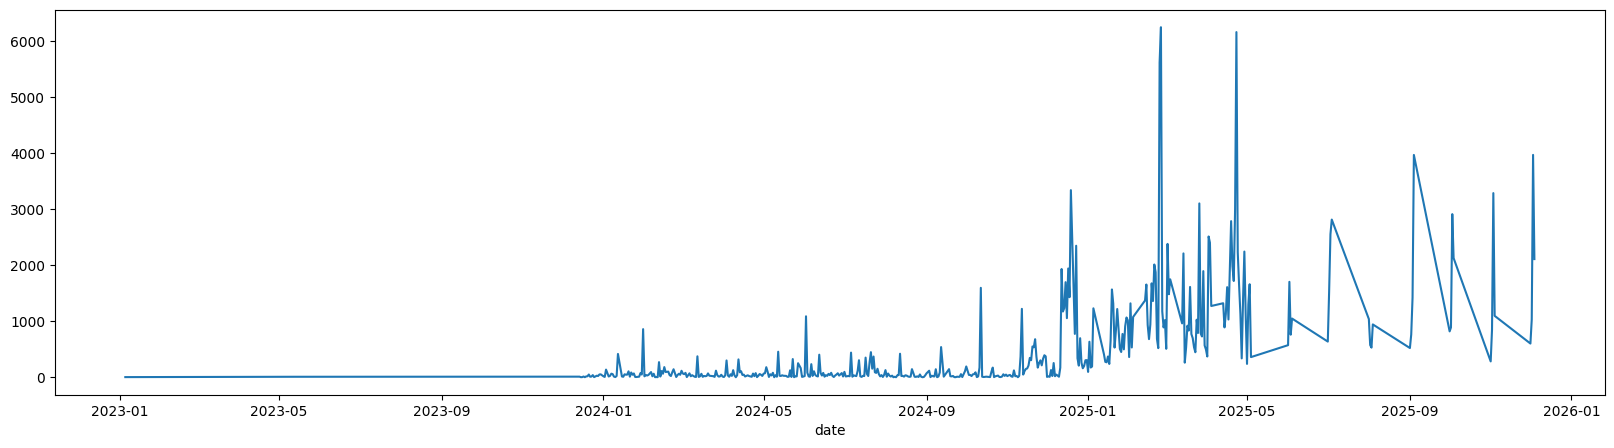

In [64]:
plt.figure(figsize=(20,5))
trades_per_day.plot()
plt.show()

Insights:

Number of trasactions have increased with time.

5. Long short ratio:

long/short ratio is the ratio of sum of transaction amount when direction is long to the sum of transaction amount when direction is short.

we will calculate long/short ratio for each account and for each transaction date.

In [65]:
short_ = ['Open Short', 'Close Short','Short > Long', 'Liquidated Isolated Short']
long_ = ['Open Long', 'Close Long','Long > Short']
account_ = trade_data['Account'].unique()
date_=trade_data['date'].unique()

def long_short_ratio(x,y):
  ls_r=[]
  for i in x:
    s_=trade_data[(trade_data[y]==i) & (trade_data['Direction'].isin(short_))]['Size USD'].sum()
    l_=trade_data[(trade_data[y]==i) & (trade_data['Direction'].isin(long_))]['Size USD'].sum()

    if s_>0:
      ls_r.append([i,l_/s_])
    else:
      ls_r.append([i,0])

  long_short_ratio = pd.DataFrame(ls_r,columns=[y,'Long short ratio'])

  return long_short_ratio

account_long_short_ratio=long_short_ratio(account_,'Account')
date_long_short_ratio=long_short_ratio(date_,'date')



In [67]:
account_long_short_ratio

,Account,Long short ratio
0,5,0.414924
1,27,0.998465
2,17,1.062558
3,12,2.999923
4,21,0.176672
5,4,43571.966185
6,3,11.713910
7,24,0.000000
8,10,0.368380
9,20,4.418905


In [68]:
date_long_short_ratio

,date,Long short ratio
0,2023-01-05,0.000000
1,2023-05-12,1.000344
2,2023-12-14,2.134857
3,2023-12-15,0.000000
4,2023-12-16,0.000000
...,...,...
475,2025-11-04,0.799322
476,2025-12-01,4.852261
477,2025-12-02,2.622561
478,2025-12-03,1.430453


Long & short ratio of accounts on fear and greed days.

In [69]:
sentiment_data['date']=pd.to_datetime(sentiment_data['date'])
trade_data['date']=pd.to_datetime(trade_data['date'])

In [70]:
trade_data=trade_data.merge(sentiment_data,on='date',how='left')

In [71]:
short_ = ['Open Short', 'Close Short','Short > Long', 'Liquidated Isolated Short']
long_ = ['Open Long', 'Close Long','Long > Short']

table1=trade_data[trade_data['Direction'].isin(long_)].groupby(['Account','classification'])['Size USD'].sum().reset_index()
table2=trade_data[trade_data['Direction'].isin(short_)].groupby(['Account','classification'])['Size USD'].sum().reset_index()

account_sentiment_long_short = table1.merge(table2,on=('Account','classification'),how='inner')
account_sentiment_long_short.columns=['Account','classification',	'long USD size',	'short USD size']
account_sentiment_long_short['acc_sent_l/s_ratio']=account_sentiment_long_short['long USD size']/account_sentiment_long_short['short USD size']

account_sentiment_long_short

,Account,classification,long USD size,short USD size,acc_sent_l/s_ratio
0,0,Fear,16785515.80,16889344.12,0.993852
1,1,Fear,75296.82,443334.26,0.169842
2,1,Greed,3672948.78,1113226.56,3.299372
3,3,Extreme Fear,196333.06,13270.25,14.794978
4,3,Extreme Greed,2657482.28,231507.93,11.479012
...,...,...,...,...,...
72,31,Extreme Fear,433927.15,1657376.87,0.261816
73,31,Extreme Greed,127410.75,1898584.93,0.067108
74,31,Fear,7494356.24,5853809.80,1.280253
75,31,Greed,547751.50,5316396.22,0.103031


For calculating drawdown proxy for traders we need data on how much token amount they hold after particular transaction (for example: total crypto currency value of particular trader after each transaction then make), this data we don't have in dataset.

We have closed pnl, from current pnl and max pnl of account & coin we can calculate drawdown with respect to pnl, this will not be accurate drawdown metric but still we can use it to understand how close or far current pnl is from max pnl for each transaction.

Lesser the value of drawdown more will be the drawdown and vice a versa.

Calculating drawdown proxy fro each transaction from transaction PnL and Max closed PnL of each account

In [72]:
trade_data['acc_coin_max_pnl'] = trade_data.groupby(['Account','Coin'])['Closed PnL'].transform('max')
trade_data['drawdown_proxy'] = trade_data['Closed PnL']-trade_data['acc_coin_max_pnl']
trade_data.head(10)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,...,Crossed,Fee,Trade ID,date,acc_avg_daily_PnL,acc_win_rate,leverage,classification,acc_coin_max_pnl,drawdown_proxy
0,5,ETH,1898.6,0.0722,137.08,BUY,0.1791,Open Long,0.0,53578,...,True,0.000000,0.000000e+00,2023-01-05,0.0,0.455215,0.403127,Fear,127.661180,-127.661180
1,5,ETH,1897.9,0.0824,156.39,BUY,0.0967,Open Long,0.0,53578,...,True,0.000000,0.000000e+00,2023-01-05,0.0,0.455215,0.852120,Fear,127.661180,-127.661180
2,5,ETH,1897.9,0.0967,183.53,BUY,0.0000,Open Long,0.0,53578,...,True,0.000000,0.000000e+00,2023-01-05,0.0,0.455215,1.000000,Fear,127.661180,-127.661180
3,27,ETH,2230.1,0.4933,1100.11,BUY,0.0000,Open Long,0.0,943,...,True,0.275027,6.320000e+14,2023-05-12,0.0,0.337134,1.000000,Neutral,1948.969192,-1948.969192
4,27,ETH,2230.1,0.2500,557.52,BUY,1.3614,Open Long,0.0,943,...,True,0.139381,2.580000e+14,2023-05-12,0.0,0.337134,0.183634,Neutral,1948.969192,-1948.969192
5,27,ETH,2230.1,3.3733,7522.80,BUY,1.6114,Open Long,0.0,943,...,True,1.880699,8.740000e+14,2023-05-12,0.0,0.337134,2.093397,Neutral,1948.969192,-1948.969192
6,27,ETH,2230.1,1.8856,4205.08,BUY,4.9847,Open Long,0.0,943,...,True,1.051269,1.020000e+15,2023-05-12,0.0,0.337134,0.378278,Neutral,1948.969192,-1948.969192
7,27,ETH,2230.2,0.4484,1000.02,BUY,6.8703,Open Long,0.0,943,...,True,0.250005,2.920000e+14,2023-05-12,0.0,0.337134,0.065266,Neutral,1948.969192,-1948.969192
8,27,ETH,2231.0,3.8932,8685.73,BUY,7.3187,Open Long,0.0,943,...,True,2.171432,1.060000e+15,2023-05-12,0.0,0.337134,0.531952,Neutral,1948.969192,-1948.969192
9,27,BTC,41867.0,0.0150,628.00,SELL,0.0000,Open Short,0.0,83612,...,True,0.157001,1.070000e+15,2023-05-12,0.0,0.337134,0.000000,Neutral,2327.241280,-2327.241280


# **Part B: Analysis**

# Question 1:

Does PnL, win rate and drawdown proxy differ between fear and greed days.

In [73]:
data=trade_data.copy()
data

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,...,Crossed,Fee,Trade ID,date,acc_avg_daily_PnL,acc_win_rate,leverage,classification,acc_coin_max_pnl,drawdown_proxy
0,5,ETH,1898.6,0.07220,137.08,BUY,0.17910,Open Long,0.000000,53578,...,True,0.000000,0.000000e+00,2023-01-05,0.000000,0.455215,0.403127,Fear,127.661180,-127.661180
1,5,ETH,1897.9,0.08240,156.39,BUY,0.09670,Open Long,0.000000,53578,...,True,0.000000,0.000000e+00,2023-01-05,0.000000,0.455215,0.852120,Fear,127.661180,-127.661180
2,5,ETH,1897.9,0.09670,183.53,BUY,0.00000,Open Long,0.000000,53578,...,True,0.000000,0.000000e+00,2023-01-05,0.000000,0.455215,1.000000,Fear,127.661180,-127.661180
3,27,ETH,2230.1,0.49330,1100.11,BUY,0.00000,Open Long,0.000000,943,...,True,0.275027,6.320000e+14,2023-05-12,0.000000,0.337134,1.000000,Neutral,1948.969192,-1948.969192
4,27,ETH,2230.1,0.25000,557.52,BUY,1.36140,Open Long,0.000000,943,...,True,0.139381,2.580000e+14,2023-05-12,0.000000,0.337134,0.183634,Neutral,1948.969192,-1948.969192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,13,BTC,83986.0,0.05346,4489.89,SELL,7.09762,Close Long,20.373606,65563,...,True,1.122472,3.530000e+14,2025-12-04,70.465233,0.401193,0.000000,NaN,19530.522500,-19510.148894
211220,13,BTC,83986.0,0.44000,36953.84,SELL,7.04416,Close Long,167.684000,65563,...,True,9.238460,4.140000e+12,2025-12-04,70.465233,0.401193,0.000000,NaN,19530.522500,-19362.838500
211221,13,BTC,83986.0,0.00015,12.60,SELL,6.60416,Close Long,0.057165,65563,...,True,0.003149,9.980000e+14,2025-12-04,70.465233,0.401193,0.000000,NaN,19530.522500,-19530.465335
211222,13,BTC,83985.0,0.95345,80075.50,SELL,6.48389,Close Long,362.406345,65563,...,True,20.018874,7.460000e+14,2025-12-04,70.465233,0.401193,0.000000,NaN,19530.522500,-19168.116155


Average PnL on fear vs greed days

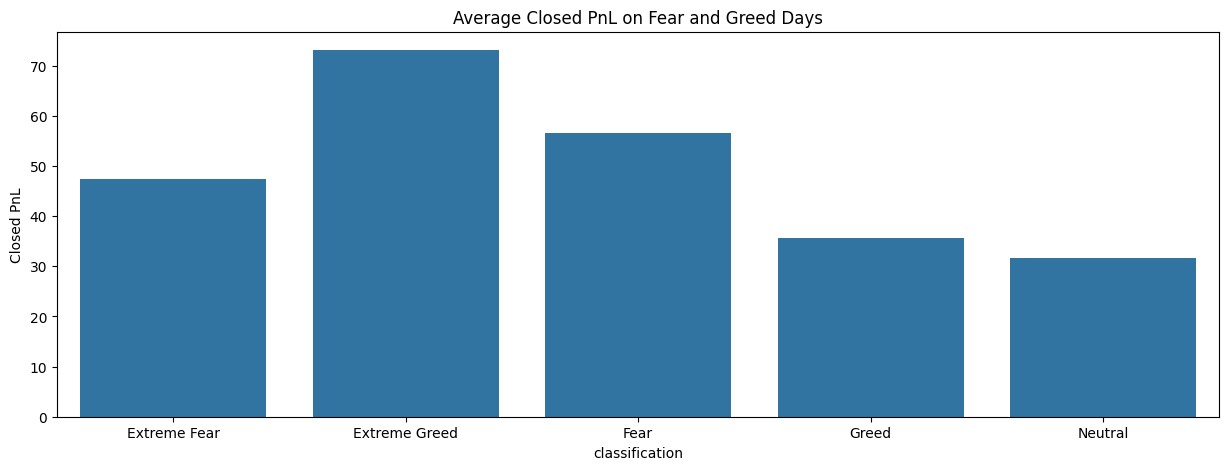

In [74]:
fear_greed_pnl = pd.DataFrame(data.groupby('classification')['Closed PnL'].mean().reset_index())
plt.figure(figsize=(15,5))
sns.barplot(x=fear_greed_pnl['classification'],y=fear_greed_pnl['Closed PnL'])
plt.title('Average Closed PnL on Fear and Greed Days')
plt.show()

From above graph we can see that avgerage values of pnl varries on fear versus greed days.

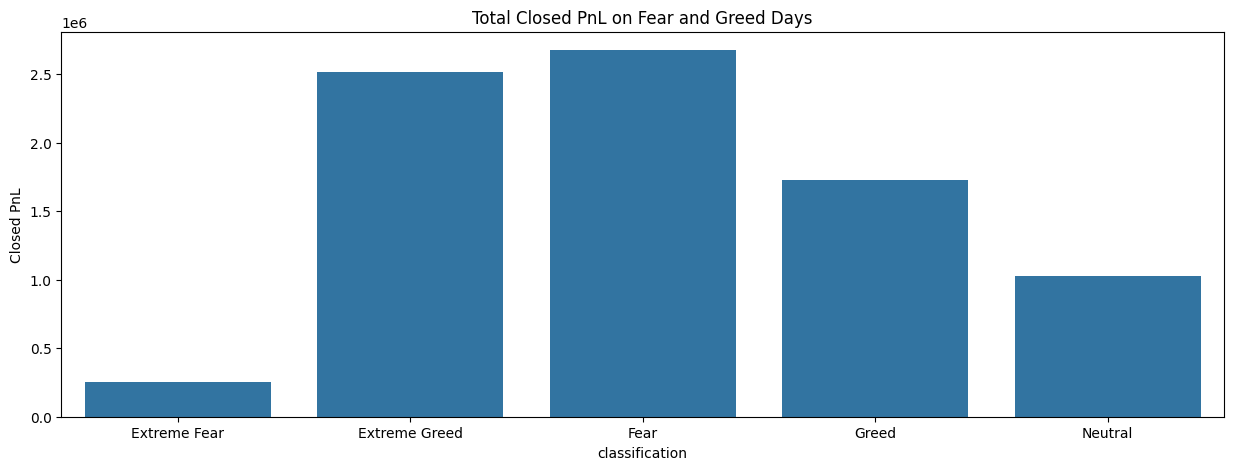

In [75]:
# Total pnl on fear vs greed days
fear_greed_pnl_ = pd.DataFrame(data.groupby('classification')['Closed PnL'].sum().reset_index())
plt.figure(figsize=(15,5))
sns.barplot(x=fear_greed_pnl_['classification'],y=fear_greed_pnl_['Closed PnL'])
plt.title('Total Closed PnL on Fear and Greed Days')
plt.show()

From this graph also we can conclude that pnl varries across fear and greed days.

**Variation of win rate on fear and greed days.**

In [76]:
win_rate_date['date']=pd.to_datetime(win_rate_date['date'])
win_rate_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      480 non-null    datetime64[ns]
 1   win rate  480 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.6 KB


In [77]:
win_rate_by_sentiment=win_rate_date.merge(sentiment_data,on='date',how='left').groupby('classification')['win rate'].mean().reset_index()
win_rate_by_sentiment

,classification,win rate
0,Extreme Fear,0.353562
1,Extreme Greed,0.410810
2,Fear,0.342800
3,Greed,0.361556
4,Neutral,0.296279


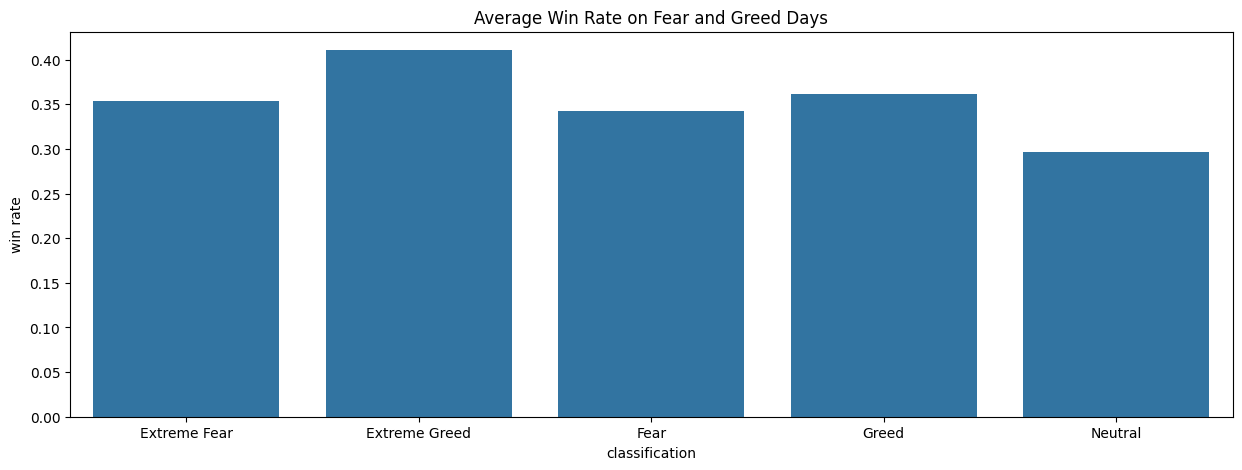

In [78]:
plt.figure(figsize=(15,5))
sns.barplot(x=win_rate_by_sentiment['classification'],y=win_rate_by_sentiment['win rate'])
plt.title('Average Win Rate on Fear and Greed Days')
plt.show()

From above graph we can see that average win rate varries across fear and greed days. Avergae win rate on fear days is low and on greed days it is high.

Therefore we can conclude that win rate varries on fear and dreed days.

**Variation of drawdown proxy on fear and greed days.**

In [79]:
# Converting drawdownproxy to percentage to bring all values on same scale.
data['drawdown_proxy'] = (-100)*(data['drawdown_proxy']/data['acc_coin_max_pnl'])
data.head(3)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Transaction Hash,...,Crossed,Fee,Trade ID,date,acc_avg_daily_PnL,acc_win_rate,leverage,classification,acc_coin_max_pnl,drawdown_proxy
0,5,ETH,1898.6,0.0722,137.08,BUY,0.1791,Open Long,0.0,53578,...,True,0.0,0.0,2023-01-05,0.0,0.455215,0.403127,Fear,127.66118,100.0
1,5,ETH,1897.9,0.0824,156.39,BUY,0.0967,Open Long,0.0,53578,...,True,0.0,0.0,2023-01-05,0.0,0.455215,0.852120,Fear,127.66118,100.0
2,5,ETH,1897.9,0.0967,183.53,BUY,0.0000,Open Long,0.0,53578,...,True,0.0,0.0,2023-01-05,0.0,0.455215,1.000000,Fear,127.66118,100.0


In [80]:
fear_greed_dp=pd.DataFrame(data[data['drawdown_proxy']<=100].groupby('classification')['drawdown_proxy'].mean().reset_index())
fear_greed_dp

,classification,drawdown_proxy
0,Extreme Fear,98.480323
1,Extreme Greed,97.066217
2,Fear,98.408720
3,Greed,97.066758
4,Neutral,98.514779


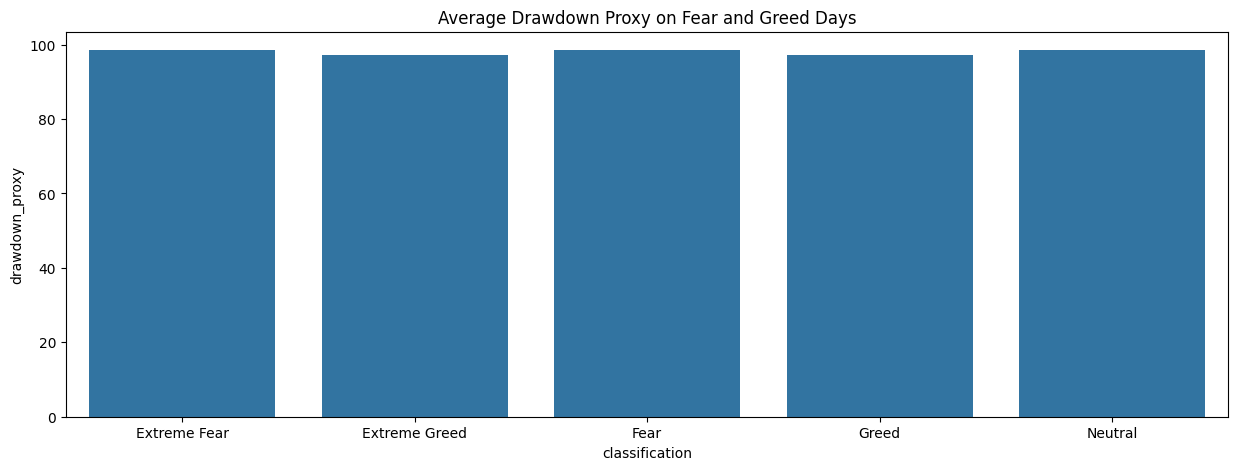

In [81]:
plt.figure(figsize=(15,5))
sns.barplot(x=fear_greed_dp['classification'],y=fear_greed_dp['drawdown_proxy'])
plt.title('Average Drawdown Proxy on Fear and Greed Days')
plt.show()

From table and graph we can say that on greed days drawdown proxy is less than on fear days which also signifies that on greed days there is more profit than on fear days.

There is not much variation in these values but still this insight can be useful to formulate trading strategies for traders.

# **Question 2 trader behaviours on fear and greed days**

For analyzing trader behaviour we consider below parameters:
1. trade frequency
2. leverage
3. long/short ratio
4. Position size/size USD.

1. Account trading freq variation by market sentiment.

In [82]:
account_trading_freq=data.groupby(['Account','classification'])['Trade ID'].count().reset_index()
account_trading_freq.rename({'Trade ID':'freq'},axis=1,inplace=True)
account_trading_freq

,Account,classification,freq
0,0,Extreme Fear,55
1,0,Extreme Greed,945
2,0,Fear,2230
3,0,Greed,298
4,0,Neutral,64
...,...,...,...
143,31,Extreme Fear,1660
144,31,Extreme Greed,6090
145,31,Fear,11409
146,31,Greed,6900


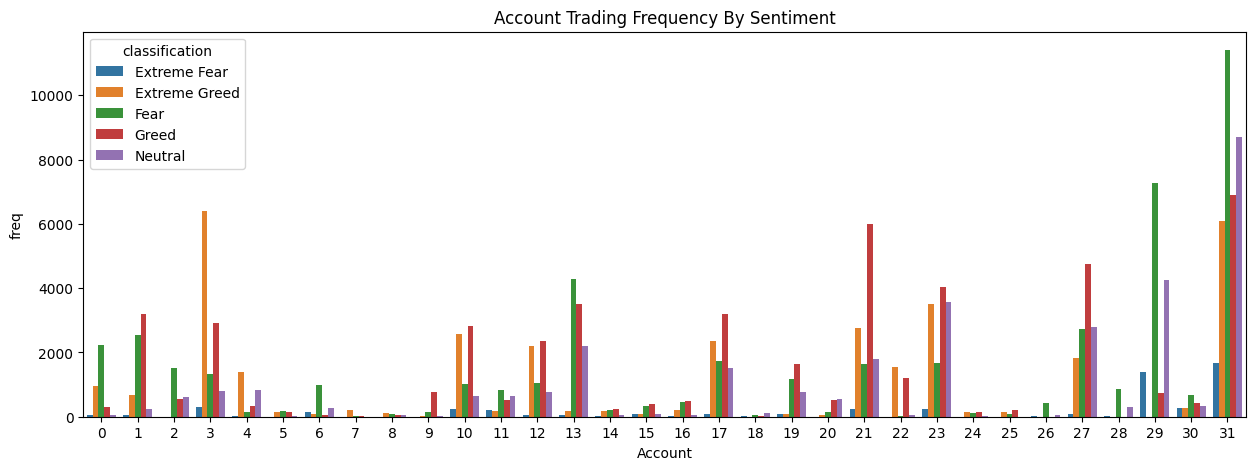

In [83]:
plt.figure(figsize=(15,5))
sns.barplot(data=account_trading_freq,x='Account',y='freq',hue='classification')
plt.title('Account Trading Frequency By Sentiment')
plt.show()

In [84]:
sentiment_trading_freq = data.groupby('classification')['Trade ID'].count()
sentiment_trading_freq

,Trade ID
classification,
Extreme Fear,5411
Extreme Greed,34393
Fear,47315
Greed,48492
Neutral,32246


Conclusion:

Trading frequency of traders varries on fear and greed days.

There is no fixed pattern in variation but usually combined trading frequency of greed days is more as compared to fear days.

2. Account leverage variation by market sentiment.

In [85]:
account_and_sentiment_leverage=data.groupby(['Account','classification'])['leverage'].mean().reset_index()

# to bring values on same scale we will divide leverage by maximum leverage of that account fr better visualisation.
account_and_sentiment_leverage['acc_max_lev'] = account_and_sentiment_leverage.groupby('Account')['leverage'].transform('max')
account_and_sentiment_leverage['derived_lev']=account_and_sentiment_leverage['leverage']/account_and_sentiment_leverage['acc_max_lev']

account_and_sentiment_leverage

,Account,classification,leverage,acc_max_lev,derived_lev
0,0,Extreme Fear,0.018182,0.546875,0.033247
1,0,Extreme Greed,0.260317,0.546875,0.476009
2,0,Fear,0.377808,0.546875,0.690848
3,0,Greed,0.523490,0.546875,0.957239
4,0,Neutral,0.546875,0.546875,1.000000
...,...,...,...,...,...
143,31,Extreme Fear,76.082506,179.296744,0.424338
144,31,Extreme Greed,16.800493,179.296744,0.093702
145,31,Fear,178.712558,179.296744,0.996742
146,31,Greed,31.565946,179.296744,0.176054


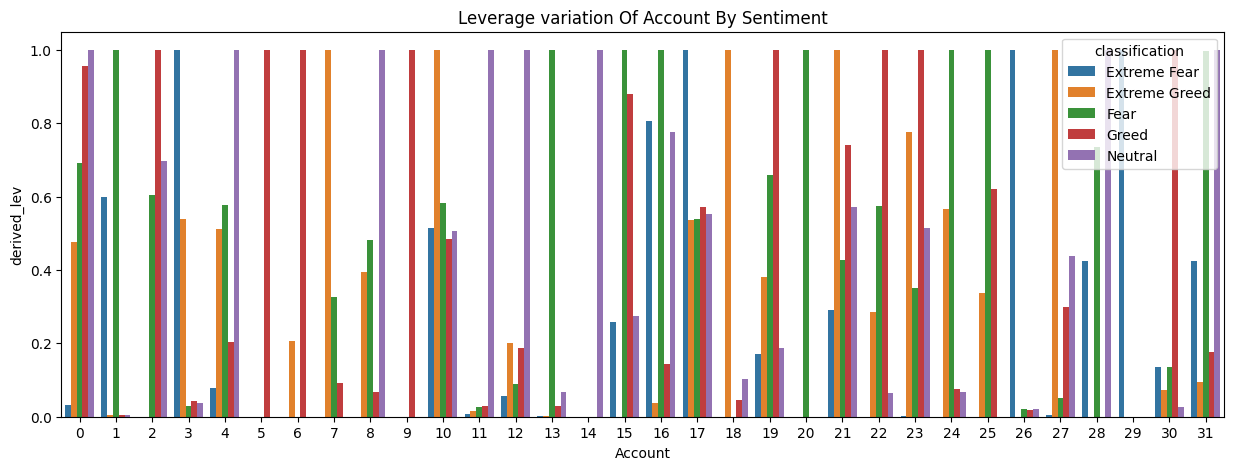

In [86]:
plt.figure(figsize=(15,5))
sns.barplot(data=account_and_sentiment_leverage,x='Account',y='derived_lev',hue='classification')
plt.title('Leverage variation Of Account By Sentiment')
plt.show()

In [87]:
account_and_sentiment_leverage.groupby('classification')['leverage'].mean()

,leverage
classification,
Extreme Fear,1.038210e+03
Extreme Greed,5.968031e+02
Fear,3.192324e+05
Greed,5.459675e+03
Neutral,3.021209e+06


Conclusion:

From the above graph and table we can say that for each account, leverage varies on fear and greed days.

For most of the accounts leverage is more on greed days as compared to on fear days.

3. variation of long/short ratio of accounts on fear and greed days.

In [88]:
account_sentiment_long_short

,Account,classification,long USD size,short USD size,acc_sent_l/s_ratio
0,0,Fear,16785515.80,16889344.12,0.993852
1,1,Fear,75296.82,443334.26,0.169842
2,1,Greed,3672948.78,1113226.56,3.299372
3,3,Extreme Fear,196333.06,13270.25,14.794978
4,3,Extreme Greed,2657482.28,231507.93,11.479012
...,...,...,...,...,...
72,31,Extreme Fear,433927.15,1657376.87,0.261816
73,31,Extreme Greed,127410.75,1898584.93,0.067108
74,31,Fear,7494356.24,5853809.80,1.280253
75,31,Greed,547751.50,5316396.22,0.103031


In [89]:
# to bring the values on same scale we will divide the l/s ratio by max l/s ratio of that account

account_sentiment_long_short['acc_max_lr_ratio']=account_sentiment_long_short.groupby('Account')['acc_sent_l/s_ratio'].transform('max')
account_sentiment_long_short['der_lr_ratio']=account_sentiment_long_short['acc_sent_l/s_ratio']/account_sentiment_long_short['acc_max_lr_ratio']

account_sentiment_long_short

,Account,classification,long USD size,short USD size,acc_sent_l/s_ratio,acc_max_lr_ratio,der_lr_ratio
0,0,Fear,16785515.80,16889344.12,0.993852,0.993852,1.000000
1,1,Fear,75296.82,443334.26,0.169842,3.299372,0.051477
2,1,Greed,3672948.78,1113226.56,3.299372,3.299372,1.000000
3,3,Extreme Fear,196333.06,13270.25,14.794978,14.794978,1.000000
4,3,Extreme Greed,2657482.28,231507.93,11.479012,14.794978,0.775872
...,...,...,...,...,...,...,...
72,31,Extreme Fear,433927.15,1657376.87,0.261816,1.280253,0.204503
73,31,Extreme Greed,127410.75,1898584.93,0.067108,1.280253,0.052418
74,31,Fear,7494356.24,5853809.80,1.280253,1.280253,1.000000
75,31,Greed,547751.50,5316396.22,0.103031,1.280253,0.080477


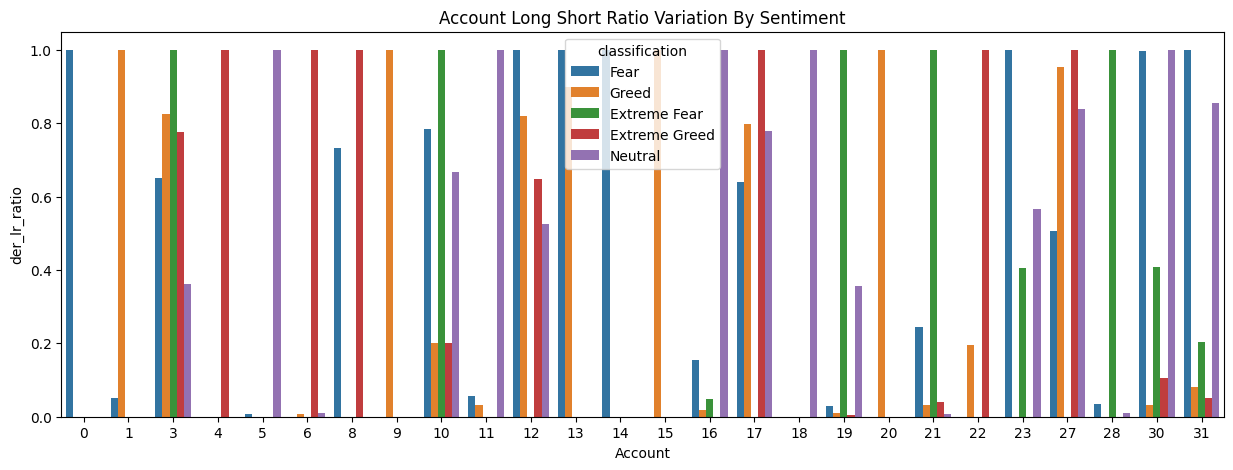

In [92]:
plt.figure(figsize=(15,5))
sns.barplot(data=account_sentiment_long_short,x='Account',y='der_lr_ratio',hue='classification')
plt.title('Account Long Short Ratio Variation By Sentiment')
plt.show()

In [93]:
account_sentiment_long_short.groupby('classification')['acc_sent_l/s_ratio'].mean()

,acc_sent_l/s_ratio
classification,
Extreme Fear,4.961040
Extreme Greed,1745.441807
Fear,2.662296
Greed,2.288399
Neutral,5.110950


Conclusion:

Long short ratio of accounts does varry on fear and greed days therefore we can say that trader behaviour does varry on fear and greed days in terms of long/short ratio.

Traders are doing long term trading on greed days by buying  and on fear days by selling.

**4. Trader behaviour by sentiment in terms of position size (value of transaction).**

In [94]:
acc_sent_ps=data.groupby(['Account','classification'])['Size USD'].mean().reset_index()
acc_sent_ps

,Account,classification,Size USD
0,0,Extreme Fear,24958.908545
1,0,Extreme Greed,12080.270550
2,0,Fear,15100.834045
3,0,Greed,29489.913289
4,0,Neutral,31276.632187
...,...,...,...
143,31,Extreme Fear,1486.926819
144,31,Extreme Greed,2410.936722
145,31,Fear,1498.110505
146,31,Greed,2495.436342


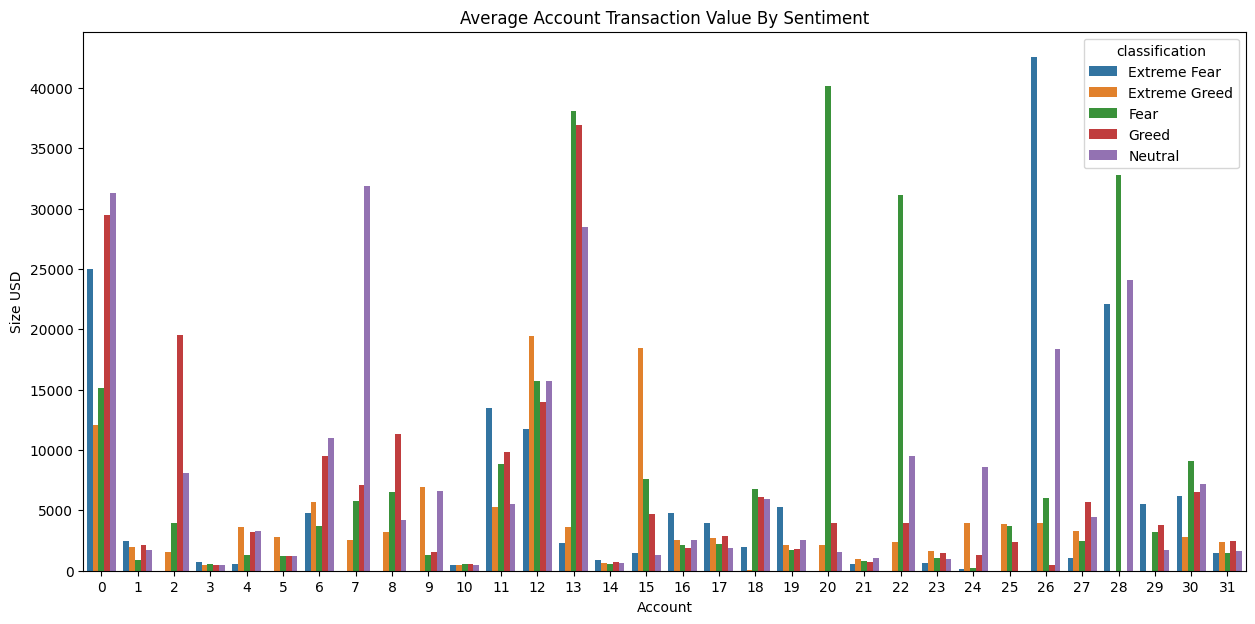

In [95]:
plt.figure(figsize=(15,7))
sns.barplot(data=acc_sent_ps,x='Account',y='Size USD',hue='classification')
plt.title('Average Account Transaction Value By Sentiment')
plt.show()

In [96]:
data.groupby('classification')['Size USD'].mean()

,Size USD
classification,
Extreme Fear,3816.440098
Extreme Greed,3265.794510
Fear,7153.414717
Greed,5848.453393
Neutral,4641.500274


Conclusion:

If we consider position size of transaction on fear and greed days for each account then we can say that trader behaviour does varry on fear and greed days.

On greed days traders tent to buy more and on fear days traders tend to buy less and sale more.

For some traders like 12,8,9,6,2 average position value on greed days is more as compared to fear days whereas for some traders like 20,22,26,28 average position value on fear days is more as compared to on greed days.

# **Question 3: Trader segmentation**

1. Trader segmentation based on leverage: We will create three categories of customers low leverage customers, medium leverage customers and high leverage customers by using leverage values.

In [97]:
trader_leverage = data.groupby('Account')['leverage'].mean().reset_index()
bins=[0,100,100000,10000000]
labels=['low_lev_cat','medium_lev_cat','high_lev_cat']
trader_leverage['segment'] = pd.cut(trader_leverage.leverage,bins=bins,labels=labels)
trader_leverage

,Account,leverage,segment
0,0,3.822712e-01,low_lev_cat
1,1,1.446179e+04,medium_lev_cat
2,2,3.928642e-01,low_lev_cat
3,3,4.438695e+00,low_lev_cat
4,4,8.275925e-01,low_lev_cat
5,5,1.917246e+04,medium_lev_cat
6,6,1.216947e+03,medium_lev_cat
7,7,2.639602e+00,low_lev_cat
8,8,2.402517e-01,low_lev_cat
9,9,2.350421e-02,low_lev_cat


In [98]:
trader_leverage.segment.value_counts()

,count
segment,
low_lev_cat,22
medium_lev_cat,7
high_lev_cat,3


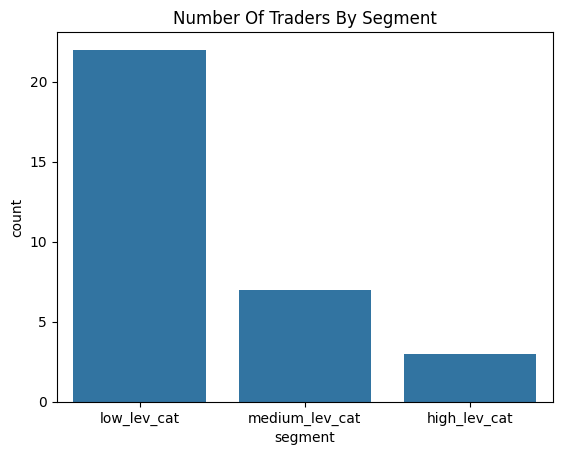

In [99]:
sns.countplot(x=trader_leverage.segment)
plt.title('Number Of Traders By Segment')
plt.show()

Trader segmentation based frequency of trading:

For this analysis also we will create three segments less frequent, moderately frequent and more frequent traders.

In [100]:
data.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash',
       'Order ID', 'Crossed', 'Fee', 'Trade ID', 'date', 'acc_avg_daily_PnL',
       'acc_win_rate', 'leverage', 'classification', 'acc_coin_max_pnl',
       'drawdown_proxy'],
      dtype='object')

In [101]:
data.groupby(['Account','date'])['Trade ID'].count().reset_index().groupby('Account')['Trade ID'].mean()

,Trade ID
Account,
0,159.083333
1,140.000000
2,317.416667
3,82.166667
4,46.942029
5,18.953488
6,78.021739
7,11.857143
8,19.150000


In [102]:
trader_trade_freq = data.groupby(['Account','date'])['Trade ID'].count().reset_index().groupby('Account')['Trade ID'].mean().reset_index()
trader_trade_freq.columns=['Account','freq_daily']
bins=[0,50,100,1000]
labels=['less freq','moderately freq','more freq']
trader_trade_freq['segment_freq'] = pd.cut(trader_trade_freq.freq_daily,bins=bins,labels=labels)
trader_trade_freq

,Account,freq_daily,segment_freq
0,0,159.083333,more freq
1,1,140.000000,more freq
2,2,317.416667,more freq
3,3,82.166667,moderately freq
4,4,46.942029,less freq
5,5,18.953488,less freq
6,6,78.021739,moderately freq
7,7,11.857143,less freq
8,8,19.150000,less freq
9,9,44.178571,less freq


In [103]:
trader_trade_freq.segment_freq.value_counts()

,count
segment_freq,
less freq,13
moderately freq,10
more freq,9


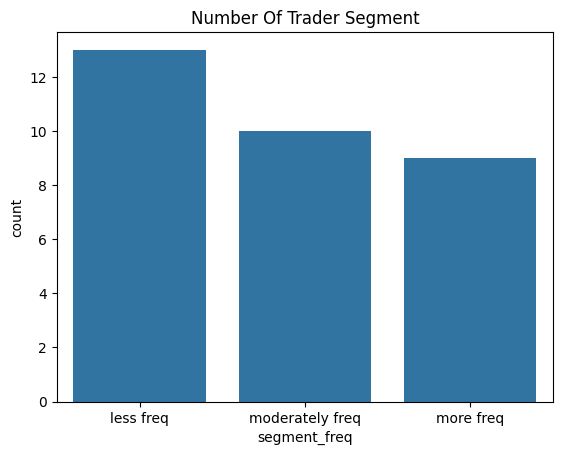

In [104]:
sns.countplot(x=trader_trade_freq.segment_freq)
plt.title('Number Of Trader Segment')
plt.show()

3. Trader segmentation by win rate.

here also we will create three segments - low, medium, high

In [105]:
acc_win_rate.agg(('min','max'))

,Account,acc_win_rate
min,0,0.234987
max,31,0.810876


In [107]:
trader_win_rate_seg = acc_win_rate.copy()
bins=[0,0.3,0.5,1]
labels=['low_wr_seg','med_wr_seg','high_wr_seg']
trader_win_rate_seg['segment_wr']=pd.cut(trader_win_rate_seg['acc_win_rate'],bins=bins,labels=labels)
trader_win_rate_seg

,Account,acc_win_rate,segment_wr
0,5,0.455215,med_wr_seg
1,27,0.337134,med_wr_seg
2,17,0.810876,high_wr_seg
3,12,0.360364,med_wr_seg
4,21,0.261968,low_wr_seg
5,4,0.519914,high_wr_seg
6,3,0.438585,med_wr_seg
7,24,0.573141,high_wr_seg
8,10,0.353445,med_wr_seg
9,20,0.330194,med_wr_seg


In [108]:
trader_win_rate_seg['segment_wr'].value_counts()

,count
segment_wr,
med_wr_seg,26
low_wr_seg,3
high_wr_seg,3


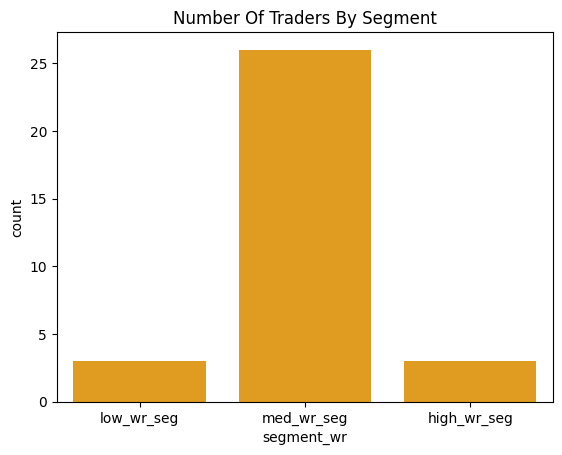

In [110]:
sns.countplot(x=trader_win_rate_seg.segment_wr,color='orange')
plt.title('Number Of Traders By Segment')
plt.show()

# **Question 3: Strategy reccomondations:**

1.  From the findings we have seen that drawdown proxy on fear days is more than on greed days and win rate, PnL is more on greed days than on fear days so we can recommond traders to do less transactions on fear days or buy less on fear days. If the fear day continues and value of coin is continuously falling then traders should sell on fear days to avoid further losses on their coins based on sound judgments, market understanding and history of particular coin.

2. Trading frequency of traders on greed days is more as compared to trading frequency on fear days which means market is perfoming well and traders are doing more number of transactions on greed days. Therefore investing in coins which have performed well in past will be more safer than in coins which shown greater volatility/losses in the past.

3. Position size, leverage and long/short ratio on fear days is more as compared to on greed days. On fear days traders mostly sell bad performing coins and that may be the reason why these values are high on fear days than on greed days. If traders are selling their coins on fear days, we can recommond them to wait for some time to understant in which direction the market is going and if the same conditions persist then it will be more suitable to sell the coins and if the market shows signs of improvement then it will be more advisable to hold the coins. In these conditions we need to have better judgment and closely monitor the situation to avoid major losses in future.

In [111]:
# data output

data.to_csv('preprocessed_combined_data.csv',index=False)
daily_pnl.to_csv('daily_profit_loss.csv',index=False)
acc_win_rate.to_csv('accoun_win_rate.csv',index=False)
win_rate_date.to_csv('date_win_rate.csv',index=False)
account_avg_trade_size.to_csv('account_avg_trade_size.csv',index=False)
trades_per_day.to_csv('trades_per_day.csv',index=False)
account_long_short_ratio.to_csv('account_long_short_ratio.csv',index=False)
date_long_short_ratio.to_csv('date_long_short_ratio.csv',index=False)
account_sentiment_long_short.to_csv('account_sentiment_long_short.csv',index=False)
account_trading_freq.to_csv('account_trading_freq.csv',index=False)


Prediction model:

We will build one cat boost prediction model to predict the closed PnL based on transaction data sentiment data.

In [ ]:
# Copy of data for model building
df = data.copy()

# We will drop account, transaction hash, order ID and trade iD columns
df = df.drop(['Account','Transaction Hash','Trade ID','Order ID'],axis=1)

df=df.fillna(0)

In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
y = df['Closed PnL']
x = df.drop('Closed PnL',axis=1)

In [ ]:
! pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.1 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import root_mean_squared_error as rmse

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Coin              211224 non-null  object        
 1   Execution Price   211224 non-null  float64       
 2   Size Tokens       211224 non-null  float64       
 3   Size USD          211224 non-null  float64       
 4   Side              211224 non-null  object        
 5   Start Position    211224 non-null  float64       
 6   Direction         211224 non-null  object        
 7   Crossed           211224 non-null  bool          
 8   Fee               211224 non-null  float64       
 9   date              211224 non-null  datetime64[ns]
 10  daily PnL         211224 non-null  float64       
 11  win rate          211224 non-null  float64       
 12  leverage          211224 non-null  float64       
 13  classification    211224 non-null  object        
 14  acc_

In [ ]:
model = CatBoostRegressor(n_estimators=200,
                          max_depth=4,
                          learning_rate=0.1,
                          cat_features = [0,4,6,13])

model.fit(xtrain,ytrain)

y_pred_train= model.predict(xtrain)
y_pred_test= model.predict(xtest)

print('*'*30)
print(f'Train score: {rmse(ytrain,y_pred_train)}')
print('*'*30)
print(f'Test score: {rmse(ytest,y_pred_test)}')
print('*'*30)

0:	learn: 886.4008374	total: 75.2ms	remaining: 15s
1:	learn: 854.3003839	total: 141ms	remaining: 13.9s
2:	learn: 827.6870151	total: 207ms	remaining: 13.6s
3:	learn: 806.3546674	total: 279ms	remaining: 13.7s
4:	learn: 781.5638382	total: 341ms	remaining: 13.3s
5:	learn: 760.7980331	total: 407ms	remaining: 13.2s
6:	learn: 743.1378938	total: 475ms	remaining: 13.1s
7:	learn: 723.9681534	total: 537ms	remaining: 12.9s
8:	learn: 704.3156518	total: 594ms	remaining: 12.6s
9:	learn: 688.7160715	total: 653ms	remaining: 12.4s
10:	learn: 673.8714621	total: 712ms	remaining: 12.2s
11:	learn: 655.9059917	total: 798ms	remaining: 12.5s
12:	learn: 641.1401430	total: 858ms	remaining: 12.3s
13:	learn: 625.2420874	total: 913ms	remaining: 12.1s
14:	learn: 613.3149921	total: 971ms	remaining: 12s
15:	learn: 598.0562468	total: 1.04s	remaining: 12s
16:	learn: 591.1179554	total: 1.1s	remaining: 11.9s
17:	learn: 577.7346357	total: 1.17s	remaining: 11.8s
18:	learn: 571.0377702	total: 1.21s	remaining: 11.5s
19:	learn

Clustering model:

We will build one kmeans clustering model to segregate transactions into different clusters.

In [ ]:
df_cluster = df.copy()

In [ ]:
df_cluster['classification']=np.where(df_cluster['classification']==0,'0',df_cluster['classification'])
df_cluster['Crossed']=df_cluster['Crossed'].astype(int)

In [ ]:
# label encoding categorical features and dropping date column
df_cluster = df_cluster.drop('date',axis=1)

from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

for i in df_cluster.columns:
  if df_cluster[i].dtype=='object':
    df_cluster[i] = encode.fit_transform(df_cluster[i])

df_cluster

,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Crossed,Fee,daily PnL,win rate,leverage,classification,acc_coin_max_pnl,drawdown_proxy
0,120,1898.6,0.07220,137.08,0,0.17910,6,0.000000,1,0.000000,0.000000,0.455215,0.403127,3,127.661180,100.000000
1,120,1897.9,0.08240,156.39,0,0.09670,6,0.000000,1,0.000000,0.000000,0.455215,0.852120,3,127.661180,100.000000
2,120,1897.9,0.09670,183.53,0,0.00000,6,0.000000,1,0.000000,0.000000,0.455215,1.000000,3,127.661180,100.000000
3,120,2230.1,0.49330,1100.11,0,0.00000,6,0.000000,1,0.275027,0.000000,0.337134,1.000000,5,1948.969192,100.000000
4,120,2230.1,0.25000,557.52,0,1.36140,6,0.000000,1,0.139381,0.000000,0.337134,0.183634,5,1948.969192,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,105,83986.0,0.05346,4489.89,1,7.09762,2,20.373606,1,1.122472,70.465233,0.401193,0.000000,0,19530.522500,99.895683
211220,105,83986.0,0.44000,36953.84,1,7.04416,2,167.684000,1,9.238460,70.465233,0.401193,0.000000,0,19530.522500,99.141426
211221,105,83986.0,0.00015,12.60,1,6.60416,2,0.057165,1,0.003149,70.465233,0.401193,0.000000,0,19530.522500,99.999707
211222,105,83985.0,0.95345,80075.50,1,6.48389,2,362.406345,1,20.018874,70.465233,0.401193,0.000000,0,19530.522500,98.144410


In [ ]:
from sklearn.cluster import KMeans

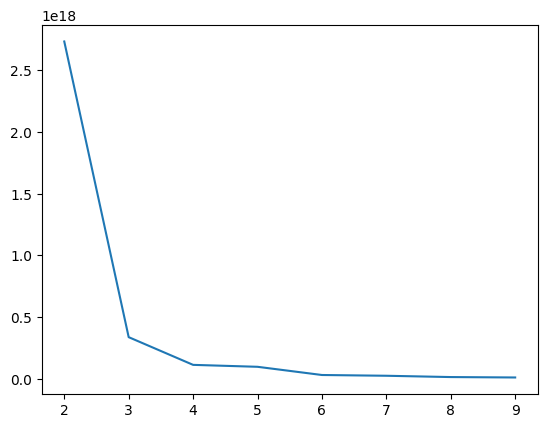

In [ ]:
n_cluster= [2,3,4,5,6,7,8,9]
wcss = []

df_cluster.replace([np.inf,-np.inf],0,inplace=True)

for i in n_cluster:
  cluster_model = KMeans(n_clusters=i,random_state=18,init='k-means++')
  cluster_model.fit(df_cluster)
  wcss.append(cluster_model.inertia_)

plt.plot(n_cluster,wcss)
plt.show()

From above graph we can see that within cluster sum of squares is not reducing much from three number of clusters therefore we will select three clusters.

In [ ]:
model_cluster = KMeans(n_clusters=3,
                       random_state=18,
                       init='k-means++')

df_cluster['segment']=model_cluster.fit_predict(df_cluster)


In [ ]:
df_cluster.groupby('segment')['Size USD'].mean()

,Size USD
segment,
0,5639.495895
1,769.600000
2,1070.910000


Segemnt 0 transactions are high value transactions.

segment 2 transactions are low value transactions.

segment 1 transactions are medium value transactions.

# **Timeseries forecasting model**

We will agrregate the clossed pnl values for each date and build one timeseries model which will predict daily pnl by using exogeneos variable.

for building timeseries model we need continuous daily data, we have some continumous date values we will use that data for building timeseries model.

In [ ]:
data_forecasting = data[(data['date']>='2023-12-14') & (data['date']<='2025-05-04')].groupby('date')['Closed PnL'].mean().reset_index()
data_forecasting = data_forecasting.merge(sentiment_data,on='date',how='left')
data_forecasting = data_forecasting.fillna(0)
data_forecasting

,date,Closed PnL,classification
0,2023-12-14,-18.675885,Greed
1,2023-12-15,-12.316017,Greed
2,2023-12-16,0.000000,Greed
3,2023-12-17,21.784485,Greed
4,2023-12-18,0.000000,Greed
...,...,...,...
445,2025-04-30,12.582028,Greed
446,2025-05-01,13.337738,Neutral
447,2025-05-02,43.721076,Greed
448,2025-05-03,162.246004,0


In [ ]:
train=data_forecasting.loc[:400]
test =data_forecasting.loc[401:]

<Axes: >

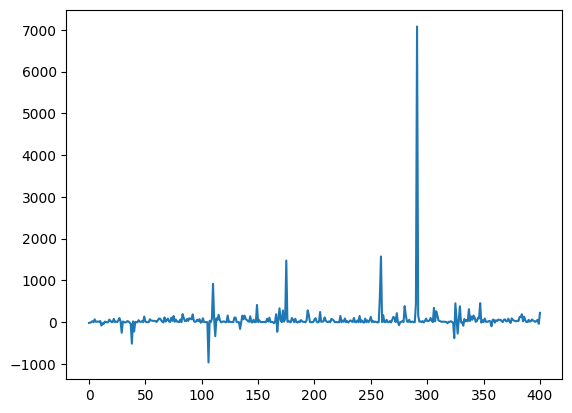

In [ ]:
train['Closed PnL'].plot()

we will consider seasonality as 50

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE 180.16103534591542


/tmp/ipython-input-1484984819.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred'] = model_sarima.forecast(steps=50)


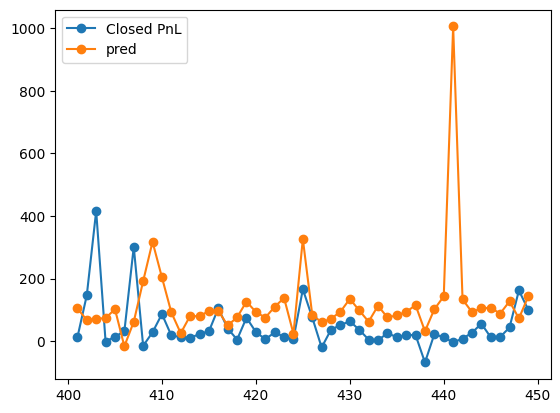

In [ ]:
# SARIMA model
model_sarima = SARIMAX(train['Closed PnL'], order=(3,1,3), seasonal_order=(1,1,1,50))
model_sarima = model_sarima.fit(disp=False)
test['pred'] = model_sarima.forecast(steps=50)
test[['Closed PnL','pred']].plot(style='-o')
print('RMSE',rmse(test['Closed PnL'],test['pred']))

This model is getting root mean squared error of 180 which is bettern than catboost prediction model. we can further reduce the error by hyperparamter tunning.

In [ ]:
data_forecasting['classification']=encode.fit_transform(data_forecasting['classification'].map({0:'0'}))
train=data_forecasting.loc[:400]
test =data_forecasting.loc[400:]

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


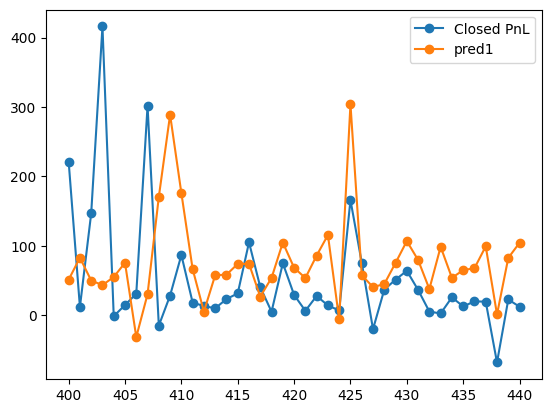

RMSE 107.40765234430128


In [ ]:
# SARIMAX model by using classification as exogenous variable
model_sarimax_ = SARIMAX(train['Closed PnL'], order=(3,1,3), seasonal_order=(1,1,1,50), exog=train.classification)
model_sarimax_ = model_sarimax_.fit(disp=False)

preds = model_sarimax_.predict(start=400, end=440, exog=test.loc[401:440, ['classification']])

test_eval = test.loc[400:440].copy()
test_eval['pred1'] = preds.values

test_eval[['Closed PnL','pred1']].plot(style='-o')
plt.show()
print('RMSE', rmse(test_eval['Closed PnL'], test_eval['pred1']))

By considering exogenous varibale root mean squared error is reducing in sarimax model and by looking at the plotted values we can see that predicted values are very close to actual values.

In dataset there are some outliers and model is picking those outliers also while training and because of that error on some values is more.

We can further reduce error by hyperparameter tunning by randomized seach CV and grid search CV.

From this model results we can say that forecasting models are performing bettern that decision tree prediction models.